In [28]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from math import sin, cos, pi, sqrt;
import matplotlib.patches as patches

# Вариант 12

$$a=F / m$$

Ускорение в каждый момент времени есть (мгновенная) скорость изменения скорости, то есть производная от скорости по времени. Следовательно, 2-й закон Ньютона можно переписать в следующем виде:

$$m*dv/dt=F$$

то есть: $$m*dv/dt=mg*dv/dt=g$$

Из этого следует, что (Равноускоренное движение) $$v=v0+gt$$

Так как $$dr/dt=v$$

(r-радиус вектор) $$dr/dt=v0+gt$$

Отсюда $$r=r0+v0t+(gt^2)/2$$

Учитывая, что v0={v0cos\alpha, v0sin(alpha)} и вектор ускорения свободного падения g имеет координаты {0,-g}, скалярные равенства:

$$
\left\{
\begin{array}{l}
    x = v0*cos\alpha *t\\
    y = v0*sin\alpha *t -\frac{g*t^{2}}{m} \\
\end{array}
\right.
$$

In [48]:
g = 9.8  # вектор свободного падения
# координаты броска
pi=3.14
x0 = 0
y0 = 2 
v0 = 16 # скорость
alpha = 73 # угол
h1 = 8  # расстояние до стены
w1 = 1  # ширина стены
wh = 12 # wall height высота низа бойницы
boinica = 3  # высота бойницы
h2 = 3  # расстояние от стены до замка
ch = 8  # castle height высота окна замка
w2 = 1 # ширина стены замка(лишь для построения рисунка)
window = 2   # высота окна

Согласно формулам выше получаем следующие функции:

In [49]:
# вычисление координаты х
def x_coord(t, x0, v0_x):
    return x0 + v0_x * t
# вычисление координаты у
def y_coord(t, y0, v0_y):
    return y0 + v0_y * t - g * t ** 2 / 2
def t_x(x, x0, v0_x):
    return (x - x0) / v0_x
def t_y(y, y0, v0_y):
    return (v0_y - sqrt(v0_y**2 + 2 * g * (y0 - y))) / g, (v0_y + sqrt(v0_y**2 + 2 * g * (y0 - y))) / g
def t_y_max(v0_y):
    return v0_y / g

Функция с заданными параметрами:

In [50]:
def model(x0, y0, v0, alpha, 
         h1, w1, wh, boinica, 
         h2, ch, w2, window ):
    # координаты стен
    wall_end = h1 + w1
    castle_dist = wall_end + h2
    castle_end = castle_dist + w2
    wall_win_top = wh + boinica
    castle_win_top = ch + window
    # угол в радианы и нахождение проекций начальной скорости
    angle = (pi * alpha) / 180
    v0x = v0 * cos(angle)
    v0y = v0 * sin(angle)
    # координата у при достижении стены
    tx = t_x(h1, x0, v0x)
    x_in_wall = x_coord(tx, x0, v0x)
    y_in_wall = y_coord(tx, y0, v0y)
    tx = t_x(wall_end, x0, v0x)
    x_out_wall = x_coord(tx, x0, v0x)
    y_out_wall = y_coord(tx, y0, v0y)
    tx = t_x(castle_dist, x0, v0x)
    x_in_castle = x_coord(tx, x0, v0x)
    y_in_castle = y_coord(tx, y0, v0y)
    tm = t_y_max(v0y)
    x_max = x_coord(tm, x0, v0x)
    y_max = y_coord(tm, y0, v0y)

    
    wall_bottom = patches.Rectangle((h1, 0),
                                w1, wh,
                                edgecolor='black', facecolor='black')
    wall_top = patches.Rectangle((h1, wh+boinica),
                             w1, wh,
                             linewidth=3, edgecolor='black', facecolor='black')
    castle_bottom = patches.Rectangle((h1+w1+h2, 0),
                                  w2, ch,
                                  edgecolor='black', facecolor='black')
    castle_top = patches.Rectangle((h1+w1+h2, ch+window),
                               w2, wh,
                               edgecolor='black', facecolor='black')
    fig = plt.figure(figsize=(16, 12))
    _, ax = plt.subplots()
    ax.add_patch(wall_bottom)
    ax.add_patch(wall_top)
    ax.add_patch(castle_bottom)
    ax.add_patch(castle_top)
    hit = True # попадание
    # полетел ниже бойницы
    if y_in_wall < wh: 
        ty = t_y(0, y0, v0y)[1]
        # не долетел до стены
        if x_coord(ty, x0, v0x) < h1:
            ts = np.linspace(0, ty, 500)
            # долетел, но не попал
        else:
            ts = np.linspace(0, t_x(h1, x0, v0x), 500)
        hit = False
         # полетел выше бойницы
    elif y_in_wall > wall_win_top: 
        ts = np.linspace(0, t_x(h1, x0, v0x), 500)
        hit = False
        # ударился о низ бойницы
    elif y_out_wall < wh: 
        ts = np.linspace(0, t_x(h1, x0, v0x), 500)
        hit = False
        # ударился о верх бойницы
    elif y_out_wall > wall_win_top: 
        ts = np.linspace(0, t_x(h1, x0, v0x), 500)
        hit = False
        # полетел ниже окна замка
    elif y_in_castle < ch: 
        ts = np.linspace(0, t_x(castle_dist, x0, v0x), 500)
        hit = False
        # полетел выше окна замка
    elif y_in_castle > castle_win_top: 
        ty = t_y(0, y0, v0y)[1]
        if x_coord(ty, x0, v0x) < castle_dist:
            ts = np.linspace(0, ty, 500)
        else:
            ts = np.linspace(0, t_x(castle_dist, x0, v0x), 500)
        hit = False
        # по траектории пролетал бойницу, но задел в ней потолок
    elif (y_in_wall > wh and y_in_wall < wall_win_top and
        y_out_wall > wh and y_out_wall < wall_win_top and
        x_max > h1 and x_max < wall_end and
        y_max > wall_win_top):
        ts = np.linspace(0, t_x(wall_end, x0, v0x), 500)
        hit = False
        # попал в окно замка
    else:
        ts = np.linspace(0, t_x(castle_end, x0, v0x), 500)
# ts - интервал времени от броска до попадания куда-либо
    # вычисление траектории полета
    x_coords = [x_coord(t, x0, v0x) for t in ts]
    y_coords = [y_coord(t, y0, v0y) for t in ts]
    # построение траектории
    ax.plot(x_coords, y_coords, color=(0,0,0))
    plt.show()
    return hit

# Камень попал в окно

<Figure size 1152x864 with 0 Axes>

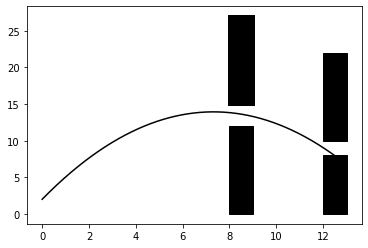

Попал


In [51]:
st = model(x0, y0, v0, alpha, 
         h1, w1, wh, boinica, 
         h2, ch, w2, window)

if st:
    print("Попал")
else:
    print("Промах")

# Камень не долетел до стены

<Figure size 1152x864 with 0 Axes>

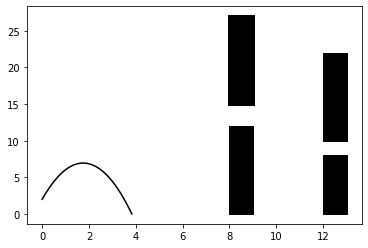

fail


In [52]:
v0 = 10
alpha = 80
st = model(x0, y0, v0, alpha, 
         h1, w1, wh, boinica, 
         h2, ch, w2, window)

if st:
    print("hit")
else:
    print("fail")

# Камень не попал в бойницу, ударившись о стену

<Figure size 1152x864 with 0 Axes>

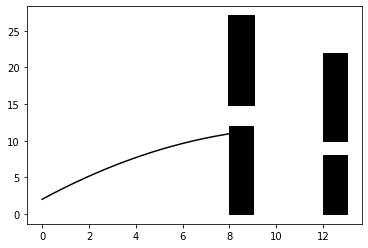

In [53]:
v0 = 16
alpha = 60    
h1 = 8
st = model(x0, y0, v0, alpha, 
         h1, w1, wh, boinica, 
         h2, ch, w2, window)

# Камень пролетел бойницу, но упал ниже окна

<Figure size 1152x864 with 0 Axes>

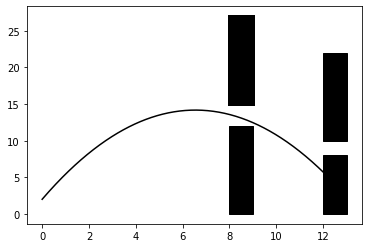

In [54]:
v0 = 16
alpha = 75
st = model(x0, y0, v0, alpha, 
         h1, w1, wh, boinica, 
         h2, ch, w2, window)

# Камень пролетел над окном

<Figure size 1152x864 with 0 Axes>

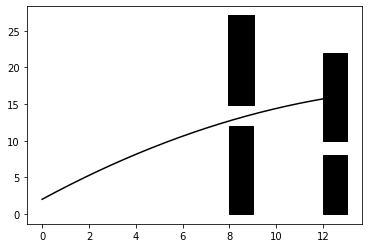

In [55]:
v0 = 20
alpha = 60
st = model(x0, y0, v0, alpha, 
         h1, w1, wh, boinica, 
         h2, ch, w2, window)